# Assignment 2: recommender System

## Code from the lecture

In [2]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [3]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [5]:
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [6]:
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])

In [14]:
def getTopN(movie_id,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

In [64]:
from scipy.spatial import distance

def EucledianDist(a,b):
    return distance.euclidean(a, b)

def getTopN2(movie_id,N=5):
    return E[movie_id,:].argsort()[-N:]

def Eucl(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN2(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")

In [12]:
#again, implementation not efficient: better use lamda opperators 
E=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            E[i,j]=EucledianDist(R[:,i],R[:,j])

In [67]:
print(CII('Raider'))
print(Eucl('Raider'))

recommending movies for: 'Raiders of the Lost Ark (1981)'
171              Empire Strikes Back, The (1980)
209    Indiana Jones and the Last Crusade (1989)
194                       Terminator, The (1984)
203                    Back to the Future (1985)
49                              Star Wars (1977)
Name: title, dtype: object
recommending movies for: 'Raiders of the Lost Ark (1981)'
285    English Patient, The (1996)
312                 Titanic (1997)
299           Air Force One (1997)
268         Full Monty, The (1997)
301       L.A. Confidential (1997)
Name: title, dtype: object


## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

In [59]:
## Just return 5 random movies in the list
def randomRS(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(np.random.choice(movies.movie_id, size=5))
    else:
        print ("no movie title containing " + str(title) + "found...")

In [63]:
randomRS('Star')

recommending movies for: 'Star Wars (1977)'


1103    C'est arrivé près de chez vous (1992)
1541               Scarlet Letter, The (1926)
1209                        Virtuosity (1995)
293                          Liar Liar (1997)
217                          Cape Fear (1991)
Name: title, dtype: object

In [169]:
## Sort all movies and calculate the average rating; excluding 0 ratings.
from scipy import stats

topMovies = dict() #store in dict and sort afterwards       
for movie in ratings['movie_id']:
    topMovies[movie] = stats.tmean([R[:,movie - 1]], (1, 5))

In [178]:
def top5RS(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(sorted(topMovies, key=topMovies.get, reverse = True)[:5])
    else:
        print ("no movie title containing " + str(title) + "found...")
        

In [185]:
top5RS('Star')

recommending movies for: 'Star Wars (1977)'


1189                              That Old Feeling (1997)
1500    Prisoner of the Mountains (Kavkazsky Plennik) ...
814                                   One Fine Day (1996)
1536                                          Cosi (1996)
1293                     Ayn Rand: A Sense of Life (1997)
Name: title, dtype: object

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


In [7]:
U,S,V = np.linalg.svd(D)

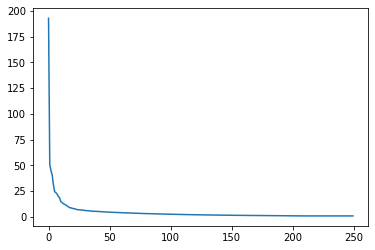

In [32]:
plt.plot(S[:250])

2829124

In [35]:
#now reconstruct with loss, using only th first 2 of 4 singular values
upper_bound = 250
Data = np.dot(U[:,:upper_bound]*S[:upper_bound],V[:upper_bound,:])

In [20]:
def getTopNSVD(movie_id,N=5):
    return Data[movie_id,:].argsort()[-N:]

def svd(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopNSVD(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")

In [36]:
svd('Star')

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
49                    Star Wars (1977)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
Name: title, dtype: object

array([[ 0.72776004,  0.40344288,  0.32887904, ..., -0.00228683,
         0.04783739,  0.03605713],
       [ 0.40344288,  0.33432366,  0.25524251, ...,  0.00670218,
         0.09541688,  0.07178068],
       [ 0.32887904,  0.25524251,  0.52451572, ..., -0.00073991,
        -0.00148151,  0.08957864],
       ...,
       [-0.00228683,  0.00670218, -0.00073991, ...,  0.71182081,
         0.00312888, -0.00450479],
       [ 0.04783739,  0.09541688, -0.00148151, ...,  0.00312888,
         0.66189561, -0.00266119],
       [ 0.03605713,  0.07178068,  0.08957864, ..., -0.00450479,
        -0.00266119,  0.58403738]])